<a href="https://colab.research.google.com/github/andrewbowen19/pythonBridgeCUNY/blob/main/andrewBowen_PythonMath_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
from scipy.stats import norm
import scipy.stats
import matplotlib.pyplot as plt

In [36]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit = wrapper(self, *args, **kwds)
 |      # if fit method is overridden only fo

In [67]:
# Would like to write a function that can help in calculating a lot of there normal distribution problems
def get_norm_probability(mu: float, std: float, val1:float, val2:float = None, boundary_type: str='greater')-> float:
  """
  Gets probability of a value occurring from a normal distribution
  Uses scipy.stats.norm module for creatign distributions/calculating probability integrals
  
  parameters:
    mu (float): distribution mean
    std (float): distribution std dev
    val1 (float): value around which probabilities should be calculates
    val2 (float); default None): if boundary_tyep == 'between', the second value between which (and val1) the probability should be calculated
    boundary_type (str): greater, lesser, between; the part of the distribution (around val 1 or 2) where we should calculate the probability
  """
  x = np.arange(mu - (-3 * std), mu * (3 * std), mu / 100)
  dist = norm(mu, std)
  prib = 0.0
  if boundary_type=='greater':
    prob =  1 - dist.cdf(val1)

  elif boundary_type == 'lesser':
    prob =  dist.cdf(val1)

  elif boundary_type == 'between':
    prob =  abs(dist.cdf(val1) - dist.cdf(val2))

  else:
    raise(ValueError, "Bad boundary type provided")

  return round(prob, 4)




1. 	The weights of steers in a herd are distributed normally.  The variance is 40,000 and the mean steer weight is 1300 lbs.  Find the probability that the weight of a randomly selected steer is greater than 979 lbs. (Round your answer to 4 decimal places)

In [63]:

steer_prob = get_norm_probability(1300., 200., 979.)
print(steer_prob)


0.9458


2. SVGA monitors manufactured by TSI Electronics have life spans that have a normal distribution with a variance of 1,960,000 and a mean life span of 11,000 hours.  If a SVGA monitor is selected at random, find the probability that the life span of the monitor will be more than 8340 hours. (Round your answer to 4 decimal places)


In [64]:
tv_prob = get_norm_probability(mu=11000., std=np.sqrt(1_960_000), val1=8340)
print(tv_prob)


0.9713


3. 	Suppose the mean income of firms in the industry for a year is 80 million dollars with a standard deviation of 3 million dollars.  If incomes for the industry are distributed normally, what is the probability that a randomly selected firm will earn between 83 and 85 million dollars? (Round your answer to 4 decimal places)


In [69]:
inc_prob = get_norm_probability(mu=80_000_000., std=3_000_000., val1=83_000_000., val2=85_000_000., boundary_type='between')
print(inc_prob)

0.1109



4. 	Suppose GRE Verbal scores are normally distributed with a mean of 456 and a standard deviation of 123.  A university plans to offer tutoring jobs to students whose scores are in the top 14%.  What is the minimum score required for the job offer?  Round your answer to the nearest whole number, if necessary.

In [79]:
# Our function doesn't do us much good here as we need to find the value from the percentile
x = np.arange(50, 650, 1)
mu = 456
std = 123

# Since we want the top 14% of grades, we'll want to find where the 86th opercentile lies (100th percentile - 14%)
# Using scipy.stats.norm.ppf function which inverts the cdf method we used above
grade = round(norm.ppf(0.86, 456, 123), 0)


print(grade)

589.0


5. 	The lengths of nails produced in a factory are normally distributed with a mean of 6.13 centimeters and a standard deviation of 0.06 centimeters.  Find the two lengths that separate the top 7% and the bottom 7%.  These lengths could serve as limits used to identify which nails should be rejected.  Round your answer to the nearest hundredth, if necessary.


In [82]:
nails_dist = norm(6.13, 0.06)
print(nails_dist)
lower_bound = round(nails_dist.ppf(0.07), 2)
upper_bound = round(nails_dist.ppf(0.93), 2)
print(f"Lower Bound length: {lower_bound}")
print(f"Upper Bound length: {upper_bound}")

Lower Bound length: 6.04
Upper Bound length: 6.22


6. 	An English professor assigns letter grades on a test according to the following scheme.
	- A:  Top 13% of scores
	- B:  Scores below the top 13% and above the bottom 55%
	- C:  Scores below the top 45% and above the bottom 20%
	- D:  Scores below the top 80% and above the bottom 9%
	- F:  Bottom 9% of scores    

Scores on the test are normally distributed with a mean of 78.8 and a standard deviation of 9.8.  Find the numerical limits for a C grade.  Round your answers to the nearest whole number, if necessary.

In [85]:
# Similar steps as above, but changing the bounds
# Need to find between 
grades_dist = norm(78.8, 9.8)
lower_bound = round(grades_dist.ppf(0.2), 0)
upper_bound = round(grades_dist.ppf(0.55), 0)

# Looks like a C grade is between a 71 and 80
print(f"Lower Bound length: {lower_bound}")
print(f"Upper Bound length: {upper_bound}")

Lower Bound length: 71.0
Upper Bound length: 80.0


7. 	Suppose ACT Composite scores are normally distributed with a mean of 21.2 and a standard deviation of 5.4.  A university plans to admit students whose scores are in the top 45%.  What is the minimum score required for admission?  Round your answer to the nearest tenth, if necessary.


In [87]:
# Need to find the 55th percentile because only the top 45% get in
act_dist = norm(21.2, 5.4)
lower_bound = round(act_dist.ppf(0.55), 0)

# 22 it is. Looks like a reasonable answer as nearly 50% of students get in and the mean of this normal dist is 21.2
print(f"Lower Bound length: {lower_bound}")

Lower Bound length: 22.0


8. 	Consider the probability that less than 11 out of 151 students will not graduate on time.  Assume the probability that a given student will not graduate on time is 9%.  Approximate the probability using the normal distribution. (Round your answer to 4 decimal places.)

In [92]:
# Need to calculate mean and std dev for this normal dist
mu = 151 * 0.09
std = np.sqrt((151*0.09*(1-0.09)))

print(f'Distribution avg: {mu}')
print(f"Std Dev: {std}")

# So on avergae, about 13 students out of a group of 151 are not expected to graduate
grad_prob = get_norm_probability(mu, std, 11, boundary_type='lesser')
print(f"The probability of less than 11 students failing to graduate is: {grad_prob}")


Distribution avg: 13.59
Std Dev: 3.5166603475456655
The probability of less than 11 students failing to graduate is: 0.2307


9. 	The mean lifetime of a tire is 48 months with a standard deviation of 7.  If 147 tires are sampled, what is the probability that the mean of the sample would be greater than 48.83 months? (Round your answer to 4 decimal places)

*Full transparency I'm implementing the method used in [this video](https://www.youtube.com/watch?v=9twCAv3wlk4) to calculate this. 

In [118]:
tire_mean = 48.
tire_std = 7.
n = 147

new_std = (tire_std / np.sqrt(n))

# Calculating a z-score
Z = (48.83 - 48) / (new_std)
print(Z)

# Need to find area under the curve to the right of our Z-score
# Calculating probability from our standard distribution and Z-score
prob = 1 - norm.cdf(Z)
tire_prob = round(prob, 4)
print(f"Prbability: {tire_prob}")


1.4376021702821653
Prbability: 0.0753


10. 	The quality control manager at a computer manufacturing company believes that the mean life of a computer is 91 months, with a standard deviation of 10.  If he is correct, what is the probability that the mean of a sample of 68 computers would be greater than 93.54 months? (Round your answer to 4 decimal places)


In [119]:
# getting another Z score
new_std = (10 / np.sqrt(68))
Z = (93.54 - 91) / new_std

print(Z)

# Calculating probability from our standard distribution and Z-score
prob = 1 - norm.cdf(Z)
print(f"Probability: {prob}")

2.0945376578137767
Probability: 0.018106056057449083


11. 	A director of reservations believes that 7% of the ticketed passengers are no-shows.  If the director is right, what is the probability that the proportion of no-shows in a sample of 540 ticketed passengers would differ from the population proportion by less than 3%? (Round your answer to 4 decimal places)


In [134]:
n = 540
mu = 0.07

new_mu = n * mu
new_std =  np.sqrt(new_mu * (1 - mu))

print("New summary stats:", new_mu, new_std)

delta = 0.03 * n
lower_bound = (mu - 0.03) * n #new_mu - delta
upper_bound = (mu + 0.03) * n #new_mu + delta
print(delta)
# We would expect ~38 no-shows with a std dev of ~5.9 in a sample of 540 from our 'population'

noshow_prob = get_norm_probability(new_mu, new_std, val1=lower_bound, val2=upper_bound, boundary_type='between')
print(f"The probability of the no-show rate being within 3% of the : {noshow_prob}")

New summary stats: 37.800000000000004 5.929080873120218
16.2
The probability of the no-show rate being within 3% of the : 0.9937


2. 	A bottle maker believes that 23% of his bottles are defective.  If the bottle maker is accurate, what is the probability that the proportion of defective bottles in a sample of 602 bottles would differ from the population proportion by greater than 4%? (Round your answer to 4 decimal places)

In [136]:
n = 602
mu = 0.23

new_mu = n * mu
new_std =  np.sqrt(new_mu * (1 - mu))

print("New summary stats:", new_mu, new_std)

delta = 0.03 * n
lower_bound = (mu - 0.03) * n #new_mu - delta
# upper_bound = (mu + 0.03) * n #new_mu + delta
print(delta)
# We would expect ~38 no-shows with a std dev of ~5.9 in a sample of 540 from our 'population'

bottle_prob = get_norm_probability(new_mu, new_std, val1=lower_bound, boundary_type='greater')
print(f"The probability of the proportion of defective bottles being greater than the population proportion by 4% or more is: {bottle_prob}")

New summary stats: 138.46 10.325415245887209
18.06
The probability of the proportion of defective bottles being greater than the population proportion by 4% or more is: 0.9599


13. 	A research company desires to know the mean consumption of beef per week among males over age 48.  Suppose a sample of size 208 is drawn with $\bar x = 3.9$ assuming $\sigma = 0.8$ .  Construct the 80% confidence interval for the mean number of lb. of beef per week among males over 48. (Round your answers to 1 decimal place)


$x= \pm  z (\frac{s}{\sqrt n})$

Looking up z statistics in [this table](http://www.z-table.com)

In [149]:
n = 208
xbar = 3.9
s = 0.8
z = 1.28

lower_bound = round(xbar - z * (s / np.sqrt(n)), 1)
upper_bound = round(xbar + z * (s / np.sqrt(n)), 1)
print(lower_bound)
print(upper_bound)


3.8
4.0


14.	An economist wants to estimate the mean per capita income (in thousands of dollars) in a major city in California.  Suppose a sample of size 7472 is drawn with $\bar x = 16.6$ Assume $r = 11$ Construct the 98% confidence interval for the mean per capita income. (Round your answers to 1 decimal place) 

In [150]:
n = 7472
xbar = 16.6
s = 11
z = 2.25

lower_bound = round(xbar - z * (s / np.sqrt(n)), 1)
upper_bound = round(xbar + z * (s / np.sqrt(n)), 1)
print(lower_bound)
print(upper_bound)

16.3
16.9


15. 	Find the value of t such that 0.05 of the area under the curve is to the left of t.  Assume the degrees of freedom equals 26.

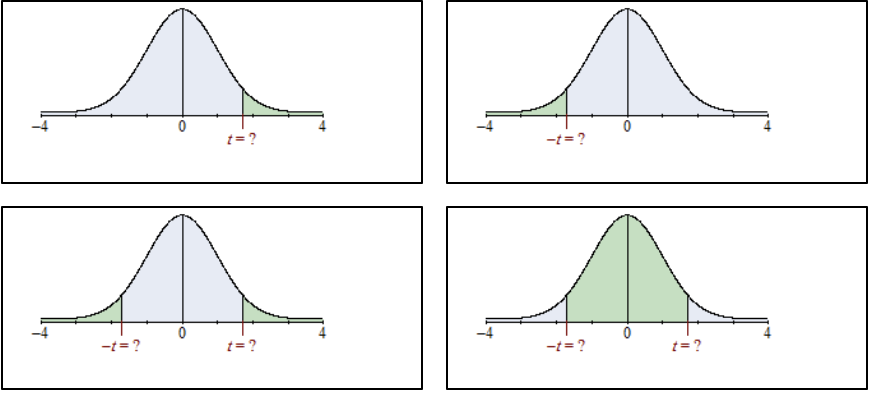




The  upper right-hand picture describes this problem best.

In [152]:
# using scipy.stats built-in t-score functionality
scipy.stats.t.ppf(0.05, 26)

-1.7056179197592731

16. 	The following measurements ( in picocuries per liter ) were recorded by a set of helium gas detectors installed in a laboratory facility:  
`383.6, 347.1, 371.9, 347.6, 325.8, 337`


Using these measurements, construct a 90% confidence interval for the mean level of helium gas present in the facility.  Assume the population is normally distributed.  

- Step 1. Calculate the sample mean for the given sample data. (Round answer to 2 decimal places) 

- Step 2. Calculate the sample standard deviation for the given sample data. (Round answer to 2 decimal places) 

- Step 3. Find the critical value that should be used in constructing the confidence interval. (Round answer to 3 decimal places) 

- Step 4. Construct the 90% confidence interval. (Round answer to 2 decimal places)


In [171]:
measurements = np.array([383.6, 347.1, 371.9, 347.6, 325.8, 337])
n = measurements.size
dof = n -1
# Step 1
mu = np.mean(measurements)
print(f"Mean value: {round(mu, 2)}")

# Step 2
sd = np.std(measurements)
print(f"Sampel std dev: {round(sd, 2)}")

# Step 3 -- since n < 30, we'll find t-statistic for this sample
t = round(abs(scipy.stats.t.ppf(0.1, dof)), 3)
print(f"t-statistic: {t}")


# Step 4
lower_bound = round((mu - t * (sd / np.sqrt(n))), 2)
upper_bound = round((mu + t * (sd / np.sqrt(n))), 2)
print(f"Confidence interval lower bound: {lower_bound}")
print(f"Confidence interval upper bound: {upper_bound}")


Mean value: 352.17
Sampel std dev: 19.79
t-statistic: 1.476
Confidence interval lower bound: 340.24
Confidence interval upper bound: 364.09


17. 	A random sample of 16 fields of spring wheat has a mean yield of 46.4 bushels per acre and standard deviation of 2.45 bushels per acre.  Determine the 80% confidence interval for the true mean yield.  Assume the population is normally distributed.  

Step 1. Find the critical value that should be used in constructing the confidence interval. (Round answer to 3 decimal places) 


Step 2. Construct the 80% confidence interval. (Round answer to 1 decimal place)

In [170]:
crit_value = round(abs(scipy.stats.t.ppf(0.1, 15)), 3)
print("t-statistic: ", crit_value)

# Step 2
n = 16
dof = n - 1
xbar = 46.4
sd = 2.45

lower_bound = round((xbar - crit_value * (sd / np.sqrt(n))), 1)
upper_bound = round((xbar + crit_value * (sd / np.sqrt(n))), 1)
print(f"Confidence interval lower bound: {lower_bound}")
print(f"Confidence interval upper bound: {upper_bound}")

t-statistic:  1.341
Confidence interval lower bound: 45.6
Confidence interval upper bound: 47.2


18. 	A toy manufacturer wants to know how many new toys children buy each year. She thinks the mean is 8 toys per year. Assume a previous study found the standard deviation to be 1.9. How large of a sample would be required in order to estimate the mean number of toys bought per child at the 99% confidence level with an error of at most 0.13 toys? (Round your answer up to the next integer)

Using the [formula](https://www.youtube.com/watch?v=FzuvdsGzxds) $n = (z * \frac{\sigma}{SE})^2$. Where $SE$ is our standard error

In [177]:
z = 2.33
sigma = 1.9
error = 0.13
n = (z * (sigma / error))**2

print(int(n))

1159



19. 	A research scientist wants to know how many times per hour a certain strand of bacteria reproduces.  He believes that the mean is 12.6.  Assume the variance is known to be 3.61.  How large of a sample would be required in order to estimate the mean number of reproductions per hour at the 95% confidence level with an error of at most 0.19 reproductions? (Round your answer up to the next integer)

In [179]:
z = 1.96 # Z-score for a 95% confidence interval
sigma = np.sqrt(3.61)
error = 0.19
n = (z * (sigma / error))**2


print(int(n))


384


20. The state education commission wants to estimate the fraction of tenth grade students that have reading skills at or below the eighth grade level.

    1. Suppose a sample of 2089 tenth graders is drawn. Of the students sampled, 1734 read above the eighth grade level.  Using the data, estimate the proportion of tenth graders reading at or below the eighth grade level. (Write your answer as a fraction or a decimal number rounded to 3 decimal places) 

    2. Suppose a sample of 2089 tenth graders is drawn.  Of the students sampled, 1734 read above the eighth grade level.

Using the data, construct the 98% confidence interval for the population proportion of tenth graders reading at or below the eighth grade level. (Round your answers to 3 decimal places)


Using [formula](https://www.rit.edu/academicsuccesscenter/sites/rit.edu.academicsuccesscenter/files/documents/math-handouts/S3_HowtoConstructAConfidenceInterval_NEW_BP_9_22_14.pdf)







In [188]:
# Step 1
n = 2089
n_above = 1734
pct_above = n_above / n

n_below = n - n_above
pct_below = round(n_below / n, 3)

print(f"Proportion of 10th graders reading below an 8th-grade level: {pct_below}")

# Step 2
z = 2.33 #abs(scipy.stats.t.ppf(0.01, n-1))
print(f"Test statistic: {z}")

# Calculating lower & upper bounds
lower_bound = round((pct_below - z * np.sqrt((pct_below * (1 - pct_below)/ n))), 3)
upper_bound = round((pct_below + z * np.sqrt((pct_below * (1 - pct_below)/ n))), 3)
print(f"Confidence interval lower bound: {lower_bound}")
print(f"Confidence interval upper bound: {upper_bound}")

Proportion of 10th graders reading below an 8th-grade level: 0.17
Test statistic: 2.33
Confidence interval lower bound: 0.151
Confidence interval upper bound: 0.189



21.	An environmentalist wants to find out the fraction of oil tankers that have spills each month.

  Step 1. Suppose a sample of 474 tankers is drawn.  Of these ships, 156 had spills.  Using the data, estimate the proportion of oil tankers that had spills. (Write your answer as a fraction or a decimal number rounded to 3 decimal places)    
  
  Step 2. Suppose a sample of 474 tankers is drawn.  Of these ships, 156 had spills.  Using the data, construct the 95% confidence interval for the population proportion of oil tankers that have spills each month. (Round your answers to 3 decimal places)

In [192]:
# Step 1
n = 474
n_spills = 156
pct_spills = round(n_spills / n, 3)

print(f'Proportion of oil tankers with spills: {pct_spills}')

# Step 2
z = round(abs(scipy.stats.t.ppf(0.025, n-1)), 2)
print(f"Test statistic: {z}")

# Calculating lower & upper bounds
lower_bound = round((pct_spills - z * np.sqrt((pct_spills * (1 - pct_spills)/ n))), 3)
upper_bound = round((pct_spills + z * np.sqrt((pct_spills * (1 - pct_spills)/ n))), 3)
print(f"Confidence interval lower bound: {lower_bound}")
print(f"Confidence interval upper bound: {upper_bound}")

Proportion of oil tankers with spills: 0.329
Test statistic: 1.96
Confidence interval lower bound: 0.287
Confidence interval upper bound: 0.371
